IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

MA Peiran 28717249

ZHOU Runlin 28717281

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import math
import random

# Importation de la librairie pickle
import pickle as pkl

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes

import time

In [2]:
data2D[0:5]

x1        x2  label
0  0.830557 -2.250314     -1
1  0.627488 -2.533405     -1
2 -1.279837 -1.630564     -1
3  2.002088 -3.415239     -1
4  3.141847 -0.376081     -1

In [3]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [4]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

In [5]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

## Partie 1 -- data 2D

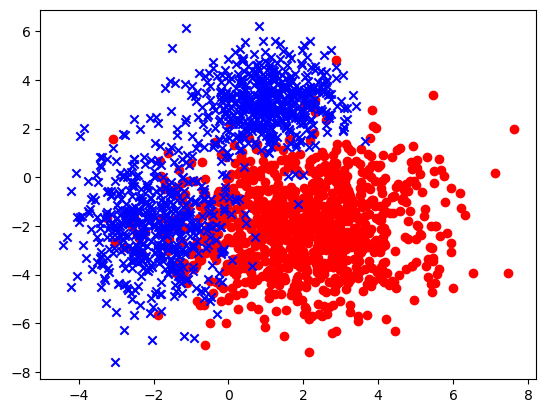

In [6]:
# Affichage
ut.plot2DSet(X2D,Y2D)

### knn classifieur

L'algorithme knn est un classificateur d'apprentissage supervisé non paramétrique qui utilise la proximité pour classer ou prédire des groupements de points de données individuels. 

Ici, nous utilisons la distance euclidienne comme métrique.
- Le principe de notre expérience est également très simple.
- Nous déterminons d'abord la plage de valeurs de k : évidemment, la valeur maximale de k est la longueur de l'ensemble de données moins un (c-a-d que le nombre de points moins un) et la valeur minimale est 1
- Nous effectuons ensuite une boucle pour tester la précision de chaque valeur de k et la stocker dans une liste.
- Enfin, la valeur k correspondant à la plus grande précision dans la liste est considérée comme le résultat de notre expérience.

In [7]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer k optimal
accuracies = []
seuil_k = len(X2D) // 20
valeurs_k = [k for k in range(1,seuil_k,3)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,2,0)
for i in valeurs_k:
    classifier_knn_temp = classif.ClassifierKNN(2,i)
    classifier_knn_temp.train(X_learn_temp, Y_learn_temp)
    accuracies.append(classifier_knn_temp.accuracy(X_test_temp, Y_test_temp))


k optimal : 40


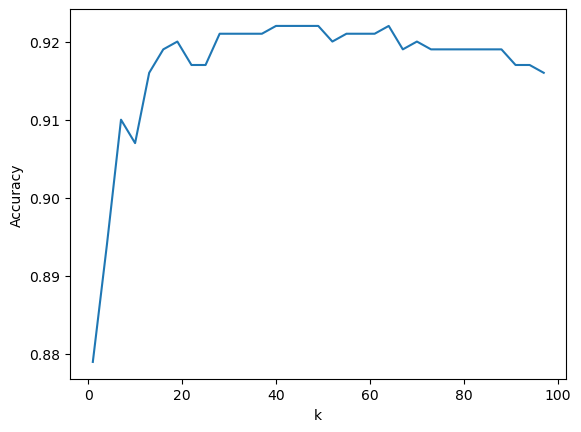

In [8]:
#affichage du graph
# x: k
# y: Accuracy du k
k_opt = accuracies.index(max(accuracies))*3+1
print("k optimal : "+str(k_opt))
plt.plot(valeurs_k, accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

Avec ce graphique linéaire, nous pouvons clairement voir l'évolution de k en fonction de la précision. Dans cette expérience, le meilleur k était de 40

Enfin, nous avons testé le temps d'exécution du programme pour **k = 40** avec le code suivant

Time used :  0.017379045486450195
Accuracy :  0.9235


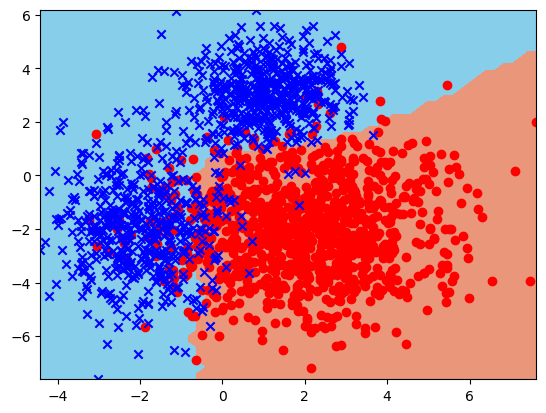

In [9]:
# PARTIE DU TEST

knn_2D = classif.ClassifierKNN(2, k_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,10,i)
    knn_2D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", knn_2D.accuracy(X2D,Y2D))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X2D,Y2D,knn_2D,step=60)
ut.plot2DSet(X2D,Y2D)

### perceptron classifieur

L'algorithme du perceptron est un algorithme d'apprentissage supervisé qui peut classer les données en deux catégories. **Ici, nous utilisons True et False pour initialiser ces données différemment**

Le principe de l'expérience est de présenter un ensemble de données d'entrée, chacune avec un label correspondant (soit 1, soit -1) à sa catégorie. Le modèle ajuste ses poids en fonction des erreurs commises dans la classification des données. Ce processus est répété jusqu'à ce que le modèle atteigne une performance satisfaisante (la précision est assez grand). Ensuite, l'ensemble de données de test est présenté au modèle afin d'évaluer sa capacité à généraliser la classification à de nouvelles données. 

Le modèle est considéré comme performant s'il parvient à classer avec précision les données de test.

In [10]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer initialisation et learning rate
accuracies_init_true = []
accuracies_init_false = []

valeurs_lr = [lr*0.001 for lr in range(1,50,1)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,2,0)
for i in valeurs_lr:
    classifier_perceptron_temp = classif.ClassifierPerceptron(2, i, True)
    classifier_perceptron_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_true.append(classifier_perceptron_temp.accuracy(X_test_temp, Y_test_temp))
    classifier_perceptron_temp = classif.ClassifierPerceptron(2, i, False)
    classifier_perceptron_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_false.append(classifier_perceptron_temp.accuracy(X_test_temp, Y_test_temp))


init optimal : True
learning rate optimal : 0.04


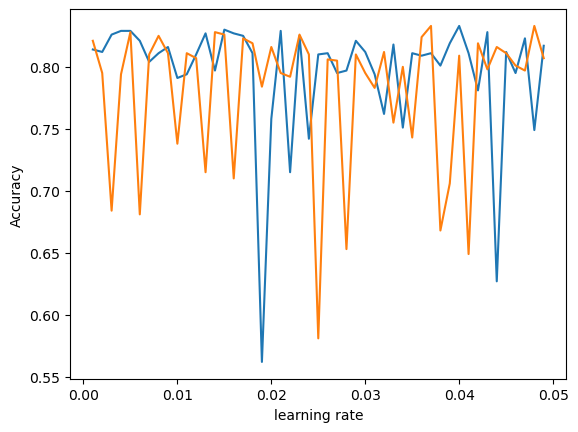

In [11]:
#pour trouver la valeur maximale
init_opt = max(accuracies_init_true)>=max(accuracies_init_false)
if init_opt:
    lr_opt = valeurs_lr[accuracies_init_true.index(max(accuracies_init_true))]
else:
    lr_opt = valeurs_lr[accuracies_init_false.index(max(accuracies_init_false))]
    
#affichage du résultat
print("init optimal : "+str(init_opt))
print("learning rate optimal : "+str(lr_opt))
plt.plot(valeurs_lr, accuracies_init_true)
plt.plot(valeurs_lr, accuracies_init_false)
plt.ylabel('Accuracy')
plt.xlabel("learning rate")
plt.show()

Time used :  4.052146911621094
Accuracy :  0.7475


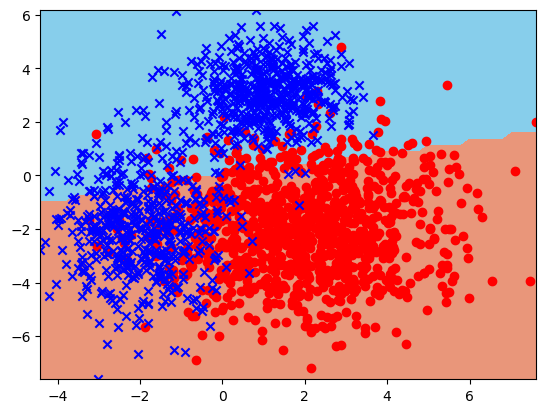

In [12]:
#PARTIE DU TEST

perceptron_2D = classif.ClassifierPerceptron(2, lr_opt, init_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,10,i)
    perceptron_2D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", perceptron_2D.accuracy(X2D,Y2D))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X2D,Y2D,perceptron_2D,step=60)
ut.plot2DSet(X2D,Y2D)

Afin d'étudier son itération, on recrée un objet, et on n'utilise pas le cross learning.

Limité par la puissance de l'ordinateur, le seuil de sortie de la boucle est difficile à atteindre (seuil trop petit ou ensemble de données trop grand).
donc on diminue le nombre maximale de l'itération. (nb_max = 1000). En conséquence, Nous devons juste trouver le "min diff" est comparé le nombre d'étape (Nombre de boucle).  L'algorithme avec moins d'étapes signifie que la fonction converge plus rapidement.

min diff : Le classificateur ne peut effectuer qu'une classification linéaire, nous devons donc changer la valeur de w pour les tests. Nous comparons la valeur de w du dernier cycle avec celle de celui-ci et calculons la distance euclidienne d. Donc, min diff est alors la plus petite d dans cette liste.

Nb iterations réalisées:  1000
min diff =  0.002902920787334192 , nb etape =  829


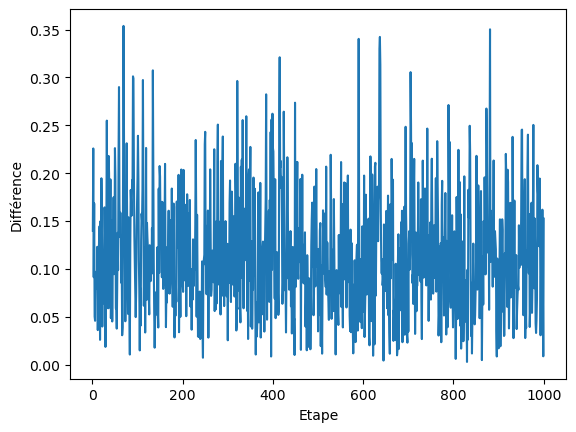

In [74]:
np.random.seed(420)
perceptron_2D = classif.ClassifierPerceptron(2, lr_opt, init_opt)
X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,20,1)
les_variations = perceptron_2D.train(X_learn_temp, Y_learn_temp,nb_max=1000)
print("Nb iterations réalisées: ", len(les_variations) )
print("min diff = ",min(les_variations),", nb etape = ",les_variations.index(min(les_variations)))

plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

### perceptron biais classifieur

Le perceptron biais classifieur est un classificateur binaire qui est conçu et implémenté en utilisant les principes de base de l'algorithme du perceptron. 
Le perceptron biais ajoute un terme de biais à la somme pondérée des entrées. La principale différence entre le perceptron biais et l'algorithme du perceptron réside dans le fait que le perceptron biais utilise une somme pondérée avec un terme de biais, tandis que l'algorithme du perceptron utilise uniquement une somme pondérée.

In [14]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer initialisation et learning rate
accuracies_init_true = []
accuracies_init_false = []

valeurs_lr = [lr*0.001 for lr in range(1,50,1)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,2,0)
for i in valeurs_lr:
    classifier_perceptron_biais_temp = classif.ClassifierPerceptron(2, i, True)
    classifier_perceptron_biais_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_true.append(classifier_perceptron_biais_temp.accuracy(X_test_temp, Y_test_temp))
    classifier_perceptron_biais_temp = classif.ClassifierPerceptron(2, i, False)
    classifier_perceptron_biais_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_false.append(classifier_perceptron_biais_temp.accuracy(X_test_temp, Y_test_temp))


init optimal : True
learning rate optimal : 0.04


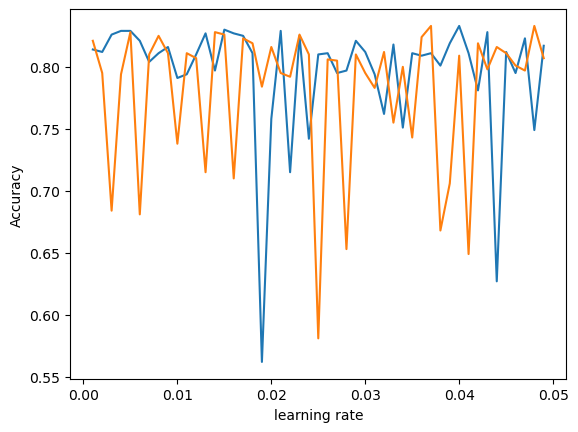

In [15]:
init_opt = max(accuracies_init_true)>=max(accuracies_init_false)
if init_opt:
    lr_opt = valeurs_lr[accuracies_init_true.index(max(accuracies_init_true))]
else:
    lr_opt = valeurs_lr[accuracies_init_false.index(max(accuracies_init_false))]
print("init optimal : "+str(init_opt))
print("learning rate optimal : "+str(lr_opt))
plt.plot(valeurs_lr, accuracies_init_true)
plt.plot(valeurs_lr, accuracies_init_false)
plt.ylabel('Accuracy')
plt.xlabel("learning rate")
plt.show()

Time used :  7.253885984420776
Accuracy :  0.821


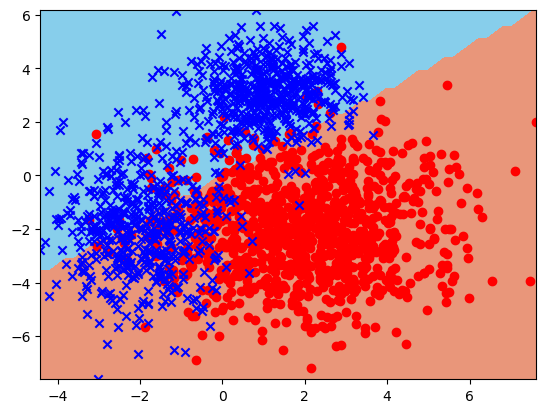

In [76]:
#PARTIE DU TEST

perceptron_biais_2D = classif.ClassifierPerceptronBiais(2, lr_opt, init_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,10,i)
    perceptron_biais_2D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", perceptron_biais_2D.accuracy(X2D,Y2D))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X2D,Y2D,perceptron_biais_2D,step=60)
ut.plot2DSet(X2D,Y2D)

Nb iterations réalisées:  1000
min diff =  0.00905512425024148 , nb etape =  586


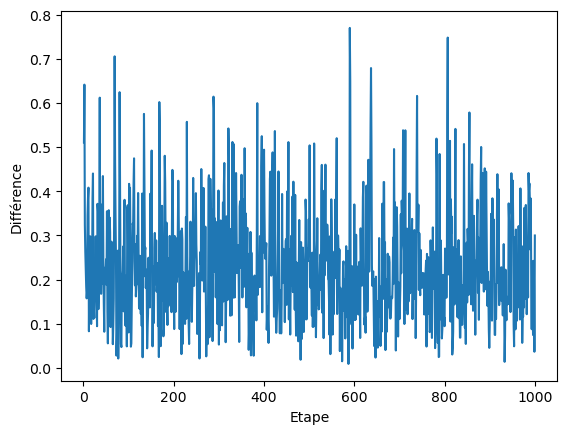

In [75]:
np.random.seed(420)
perceptron_biais_2D = classif.ClassifierPerceptronBiais(2, lr_opt, init_opt)
X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,20,1)
les_variations = perceptron_biais_2D.train(X_learn_temp, Y_learn_temp,nb_max=1000)
print("Nb iterations réalisées: ", len(les_variations) )
print("min diff = ",min(les_variations),", nb etape = ",les_variations.index(min(les_variations)))

plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

nb etape (perceptron classifieur) : 829
nb etape (perceptron biais classifieur) : 586

perceptron peut convergence plus rapide

## Partie 2 -- data 5D

La dimension de ce dataset est 5, nous représentons sa classification par C52 = 10 images 2D.L'image sera une vue en coupe bidimensionnelle de l'espace à cinq dimensions lorsque les valeurs des trois dimensions non choisis sont leurs valeurs moyennes.

Ces images ont peu d'importance, car les points de l'image sont les projections de points à cinq dimensions en deux dimensions, mais la division de la zone est basée sur les valeurs spécifiques des trois dimensions restantes. Cela ne représente pas très bien le cas de la classification.

Pour résoudre ce problème, nous pouvons réécrire la fonction plot2DSet. Pour chaque point [dim1, dim2] dans l'espace linéaire à deux dimensions, nous comptons toutes les valeurs possibles de [dim_rest_1, dim_rest_2, dim_rest_3], et marquons le point avec une étiquette plus probable.

Cependant, cela augmentera considérablement la complexité de la fonction, atteignant O(n^5), ce qui entraînera l'exécution du programme pendant une durée extrêmement longue. Nous n'avons donc pas fait cela.

In [18]:
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb')) 
X5D = np.array(data5D[['x1', 'x2', 'x3', 'x4', 'x5']], dtype=float)
Y5D = np.array(data5D['label'], dtype=float)

In [19]:
data5D[0:5]

x1        x2        x3        x4        x5  label
0 -0.472352 -0.035994  0.572799  2.017446 -1.865967     -1
1  1.993913  0.984667 -1.180237  1.460067 -0.195743     -1
2  0.923188  1.194008  0.065319  0.909784  0.832256     -1
3  2.540148 -0.427836 -0.113014  3.257095 -1.689755     -1
4  4.331413  0.590868 -1.105335  4.475987 -1.790176     -1

In [20]:
X5D[0:5]

array([[-0.4723522 , -0.03599385,  0.57279854,  2.01744639, -1.86596742],
       [ 1.9939134 ,  0.9846668 , -1.18023654,  1.46006741, -0.19574327],
       [ 0.92318832,  1.19400787,  0.06531872,  0.90978449,  0.83225595],
       [ 2.54014784, -0.42783646, -0.11301444,  3.2570952 , -1.68975456],
       [ 4.33141251,  0.59086794, -1.10533473,  4.47598742, -1.79017634]])

In [21]:
Y5D[0:5]

array([-1., -1., -1., -1., -1.])

Pour le jeu de données 5D, les expériences sont en principe similaires à celles de la 2D. 

Cependant, pour le traitement des données, nous avons combiné les 5 paramètres deux par deux et les avons présentés en 2D, c-a-d que 10 graphiques.

### knn classifieur

In [22]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer k optimal
accuracies = []
seuil_k = len(X5D) // 20
valeurs_k = [k for k in range(1,seuil_k,3)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,2,0)
for i in valeurs_k:
    classifier_knn_temp = classif.ClassifierKNN(5,i)
    classifier_knn_temp.train(X_learn_temp, Y_learn_temp)
    accuracies.append(classifier_knn_temp.accuracy(X_test_temp, Y_test_temp))


k optimal : 43


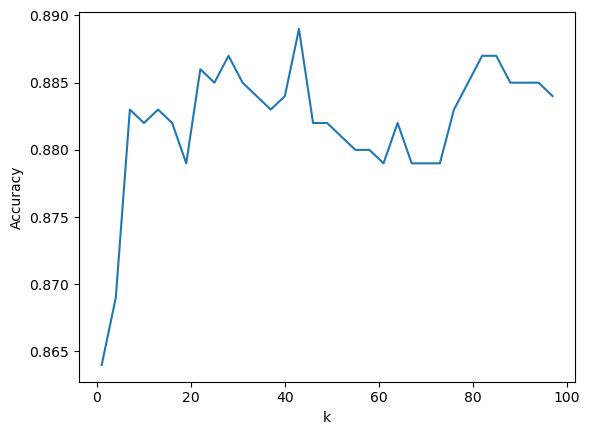

In [23]:
k_opt = accuracies.index(max(accuracies))*3+1
print("k optimal : "+str(k_opt))
plt.plot(valeurs_k, accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

In [24]:
knn_5D = classif.ClassifierKNN(5, k_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,10,i)
    knn_5D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", knn_5D.accuracy(X5D,Y5D))


Time used :  0.01760697364807129
Accuracy :  0.8875


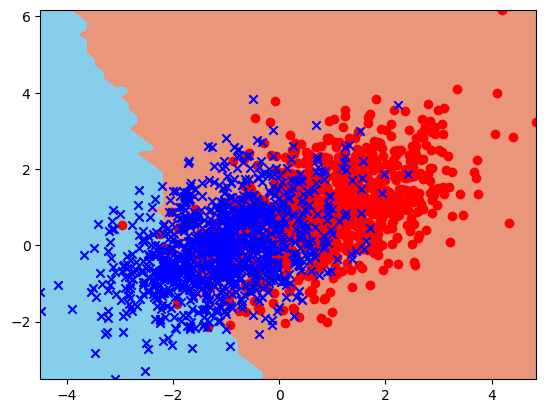

In [25]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 0, 1, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,1]]).T,Y5D)

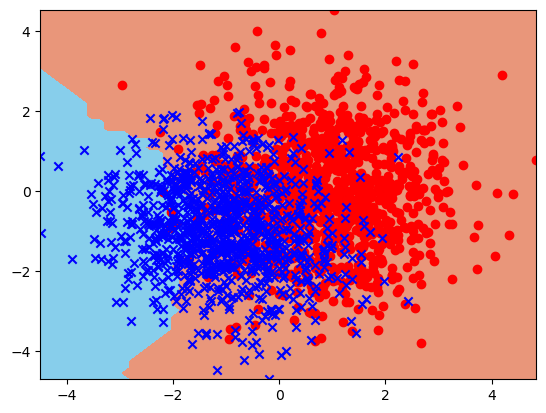

In [26]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 0, 2, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,2]]).T,Y5D)

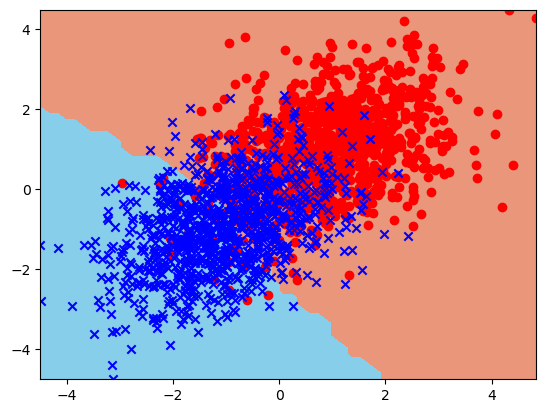

In [27]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 0, 3, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,3]]).T,Y5D)

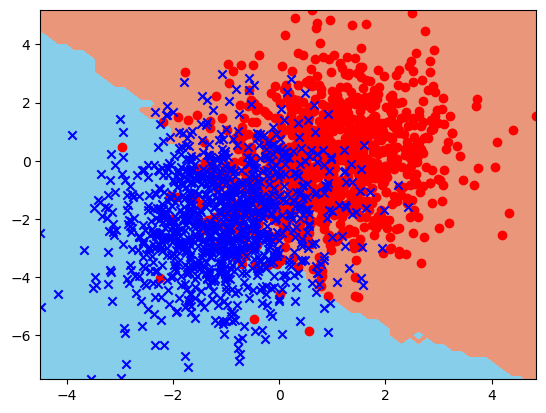

In [28]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 0, 4, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,4]]).T,Y5D)

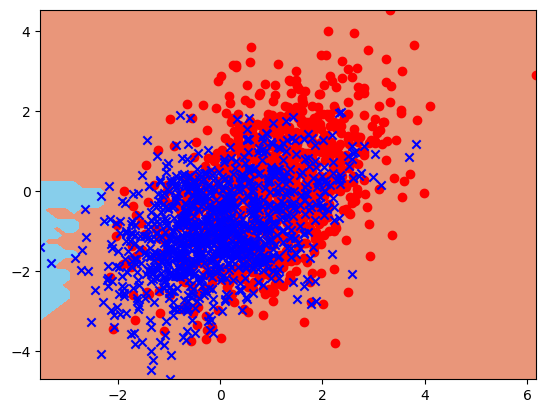

In [29]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 1, 2, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,2]]).T,Y5D)

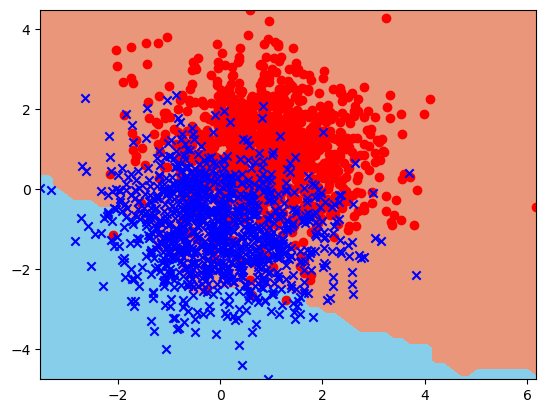

In [30]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 1, 3, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,3]]).T,Y5D)

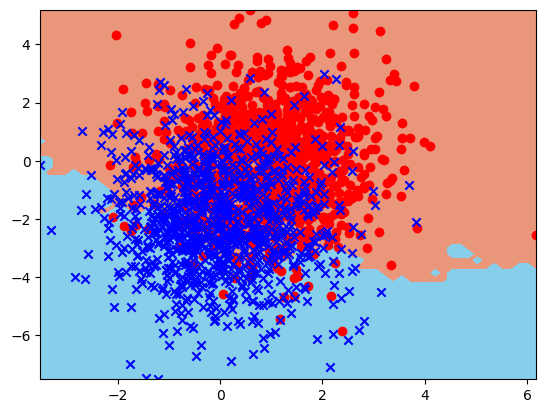

In [31]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 1, 4, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,4]]).T,Y5D)

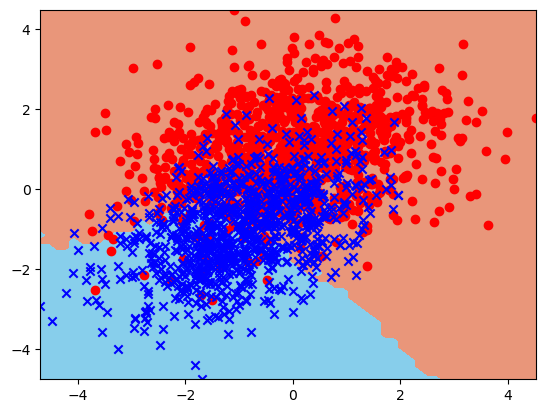

In [32]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 2, 3, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,3]]).T,Y5D)

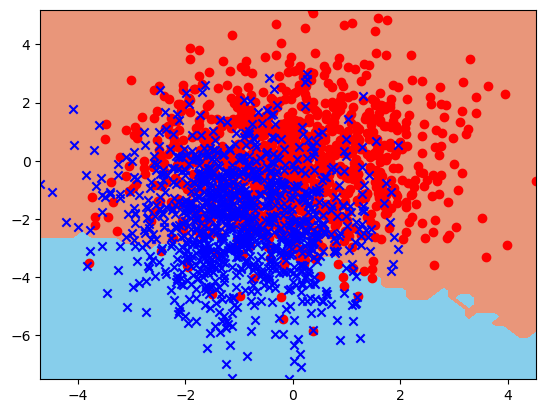

In [33]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 2, 4, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,4]]).T,Y5D)

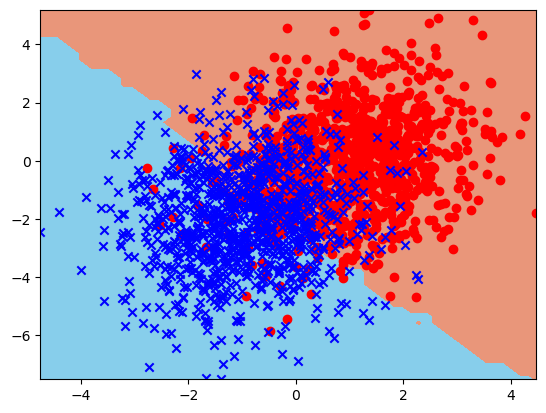

In [34]:
ut.plot_frontiere_high_dimension(X5D,Y5D,knn_5D,5, 3, 4, step=60)
ut.plot2DSet(np.array([X5D[:,3],X5D[:,4]]).T,Y5D)

Nb iterations réalisées:  1000
min diff =  0.002896706802209658 , nb etape =  940


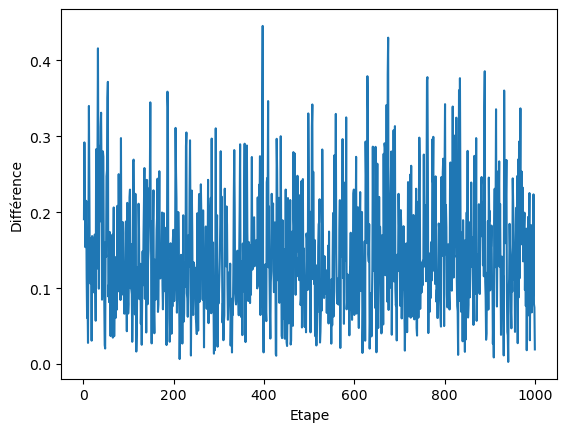

In [35]:
np.random.seed(42)
perceptron_5D = classif.ClassifierPerceptron(2, lr_opt, init_opt)
X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X2D,Y2D,2,1)
les_variations = perceptron_2D.train(X_learn_temp, Y_learn_temp,nb_max=1000)
print("Nb iterations réalisées: ", len(les_variations) )
print("min diff = ",min(les_variations),", nb etape = ",les_variations.index(min(les_variations)))

plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

### perceptron classifieur

In [36]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer initialisation et learning rate
accuracies_init_true = []
accuracies_init_false = []

valeurs_lr = [lr*0.001 for lr in range(1,50,1)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,2,0)
for i in valeurs_lr:
    classifier_perceptron_temp = classif.ClassifierPerceptron(5, i, True)
    classifier_perceptron_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_true.append(classifier_perceptron_temp.accuracy(X_test_temp, Y_test_temp))
    classifier_perceptron_temp = classif.ClassifierPerceptron(5, i, False)
    classifier_perceptron_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_false.append(classifier_perceptron_temp.accuracy(X_test_temp, Y_test_temp))

init optimal : False
learning rate optimal : 0.033


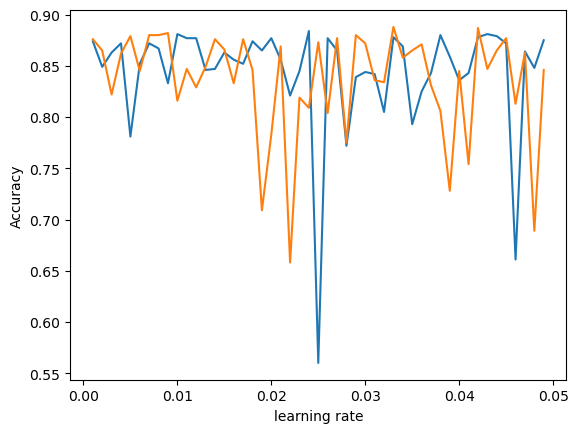

In [37]:
init_opt = max(accuracies_init_true)>=max(accuracies_init_false)
if init_opt:
    lr_opt = valeurs_lr[accuracies_init_true.index(max(accuracies_init_true))]
else:
    lr_opt = valeurs_lr[accuracies_init_false.index(max(accuracies_init_false))]
print("init optimal : "+str(init_opt))
print("learning rate optimal : "+str(lr_opt))
plt.plot(valeurs_lr, accuracies_init_true)
plt.plot(valeurs_lr, accuracies_init_false)
plt.ylabel('Accuracy')
plt.xlabel("learning rate")
plt.show()

In [38]:
perceptron_5D = classif.ClassifierPerceptron(5, lr_opt, init_opt)

# Cross learning
time_start = time.time()
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,10,i)
    perceptron_5D.train(X_learn_temp, Y_learn_temp)
print("Time used : ", time.time()-time_start)
print("Accuracy : ", perceptron_5D.accuracy(X5D,Y5D))

Time used :  3.8048360347747803
Accuracy :  0.8825


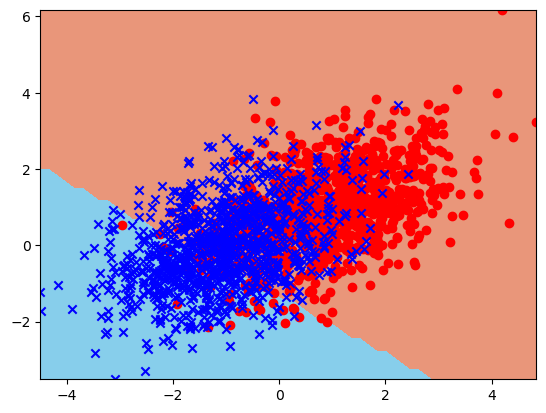

In [39]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 0, 1, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,1]]).T,Y5D)

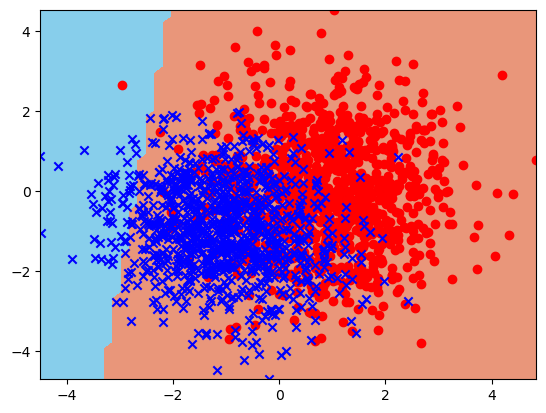

In [40]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 0, 2, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,2]]).T,Y5D)

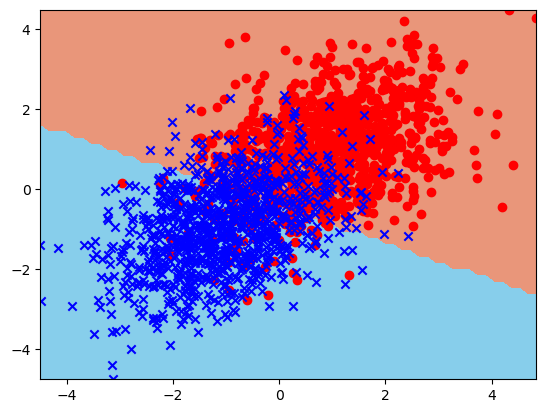

In [41]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 0, 3, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,3]]).T,Y5D)

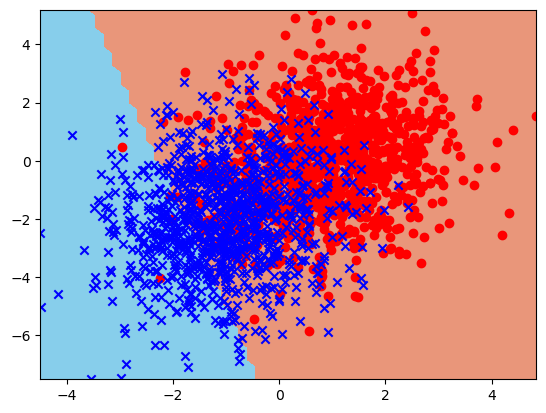

In [42]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 0, 4, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,4]]).T,Y5D)

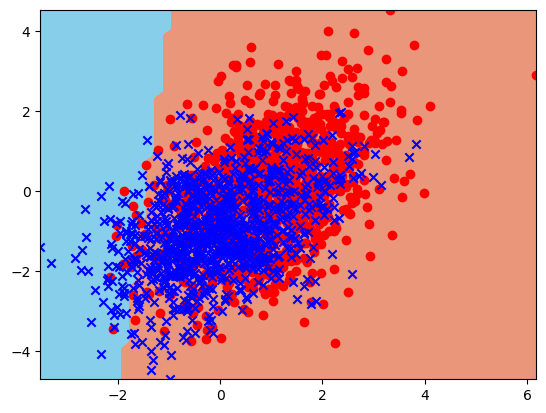

In [43]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 1, 2, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,2]]).T,Y5D)

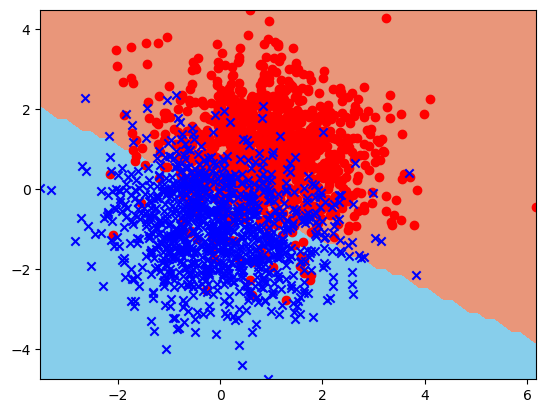

In [44]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 1, 3, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,3]]).T,Y5D)

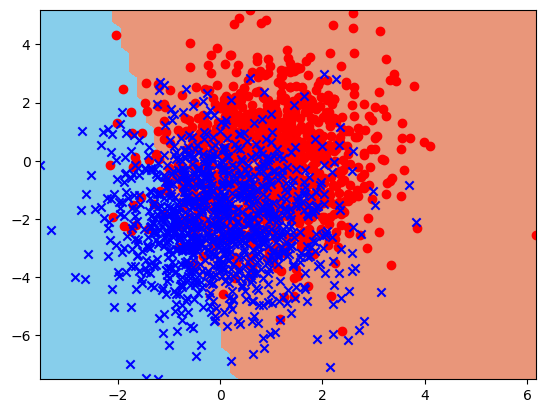

In [45]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 1, 4, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,4]]).T,Y5D)

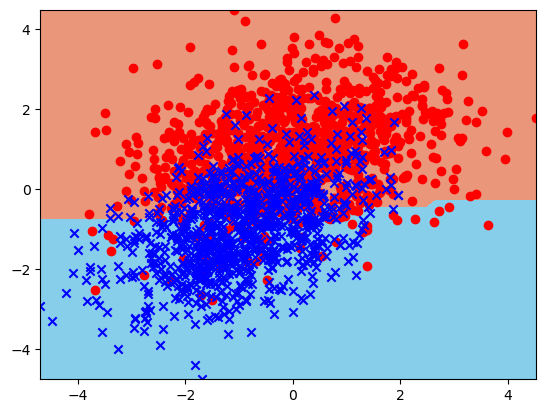

In [46]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 2, 3, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,3]]).T,Y5D)

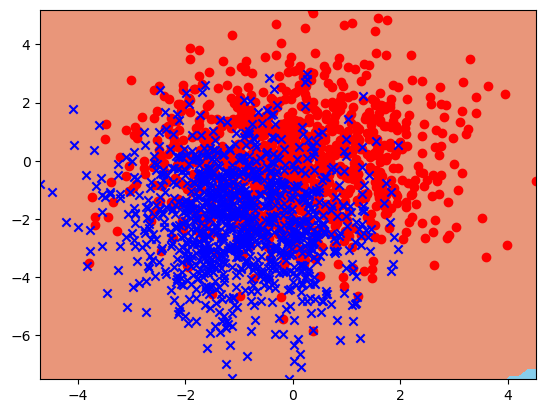

In [47]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 2, 4, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,4]]).T,Y5D)

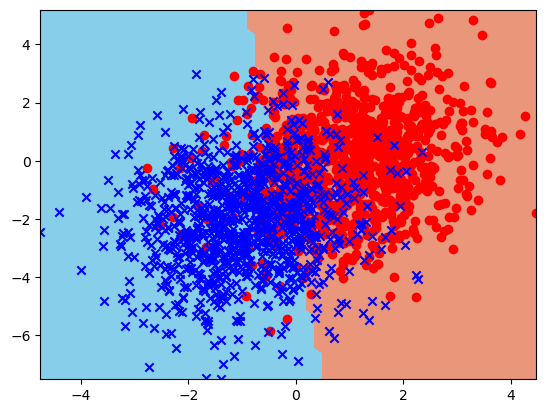

In [48]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_5D,5, 3, 4, step=60)
ut.plot2DSet(np.array([X5D[:,3],X5D[:,4]]).T,Y5D)

Nb iterations réalisées:  1000
min diff =  0.02363977238585635 , nb etape =  500


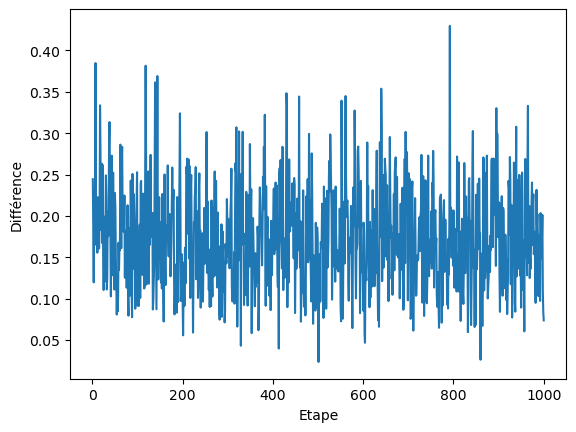

In [49]:
np.random.seed(42)
perceptron_5D = classif.ClassifierPerceptron(5, lr_opt, init_opt)
X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,20,1)
les_variations = perceptron_5D.train(X_learn_temp, Y_learn_temp,nb_max=1000)
print("Nb iterations réalisées: ", len(les_variations) )
print("min diff = ",min(les_variations),", nb etape = ",les_variations.index(min(les_variations)))

plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

### perceptron biais classifieur

In [50]:
np.random.seed(42)   # on prend 42 comme graine

# Déterminer initialisation et learning rate
accuracies_init_true = []
accuracies_init_false = []

valeurs_lr = [lr*0.001 for lr in range(1,50,1)]

X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,2,0)
for i in valeurs_lr:
    classifier_perceptron_biais_temp = classif.ClassifierPerceptron(5, i, True)
    classifier_perceptron_biais_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_true.append(classifier_perceptron_biais_temp.accuracy(X_test_temp, Y_test_temp))
    classifier_perceptron_biais_temp = classif.ClassifierPerceptron(5, i, False)
    classifier_perceptron_biais_temp.train(X_learn_temp, Y_learn_temp)
    accuracies_init_false.append(classifier_perceptron_biais_temp.accuracy(X_test_temp, Y_test_temp))

init optimal : False
learning rate optimal : 0.033


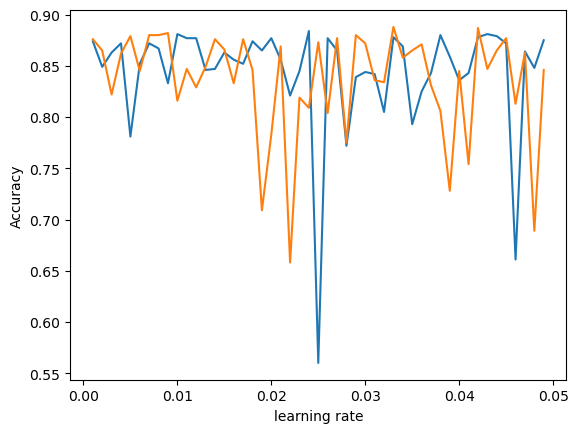

In [51]:
init_opt = max(accuracies_init_true)>=max(accuracies_init_false)
if init_opt:
    lr_opt = valeurs_lr[accuracies_init_true.index(max(accuracies_init_true))]
else:
    lr_opt = valeurs_lr[accuracies_init_false.index(max(accuracies_init_false))]
print("init optimal : "+str(init_opt))
print("learning rate optimal : "+str(lr_opt))
plt.plot(valeurs_lr, accuracies_init_true)
plt.plot(valeurs_lr, accuracies_init_false)
plt.ylabel('Accuracy')
plt.xlabel("learning rate")
plt.show()

In [52]:
perceptron_biais_5D = classif.ClassifierPerceptronBiais(5, lr_opt, init_opt)

# Cross learning
time_start = time.time()
nb_iter = 0
for i in range(10):
    X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,10,i)
    les_variations = perceptron_biais_5D.train(X_learn_temp, Y_learn_temp)
    nb_iter += len(les_variations)
print("Time used : ", time.time()-time_start)
print("Nb iterations réalisées: ", nb_iter )
print("Accuracy : ", perceptron_biais_5D.accuracy(X5D,Y5D))

Time used :  6.631169080734253
Nb iterations réalisées:  1000
Accuracy :  0.8805


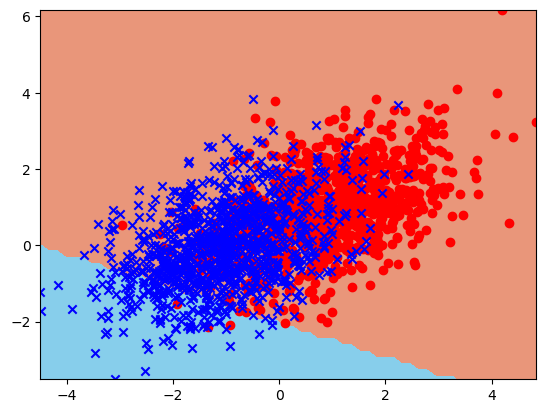

In [53]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 0, 1, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,1]]).T,Y5D)

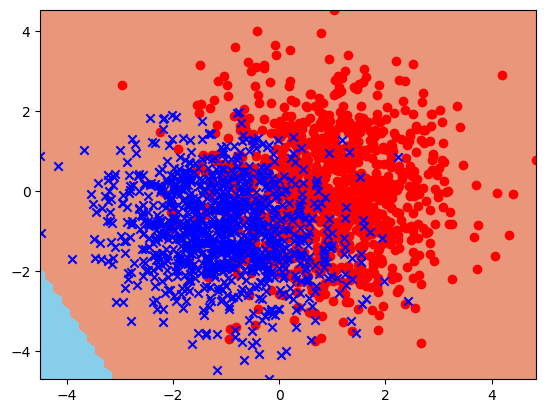

In [54]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 0, 2, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,2]]).T,Y5D)

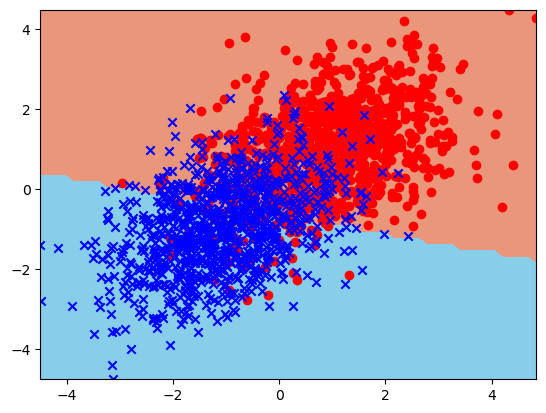

In [55]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 0, 3, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,3]]).T,Y5D)

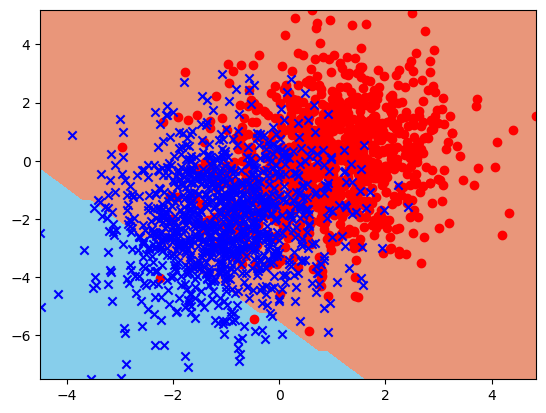

In [56]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 0, 4, step=60)
ut.plot2DSet(np.array([X5D[:,0],X5D[:,4]]).T,Y5D)

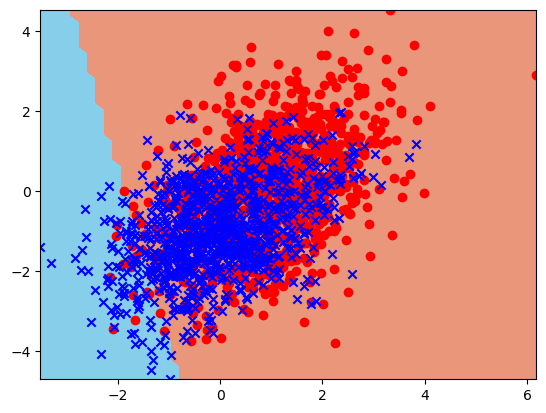

In [57]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 1, 2, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,2]]).T,Y5D)

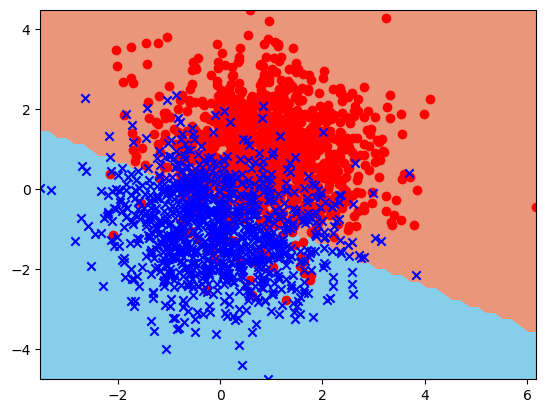

In [58]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 1, 3, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,3]]).T,Y5D)

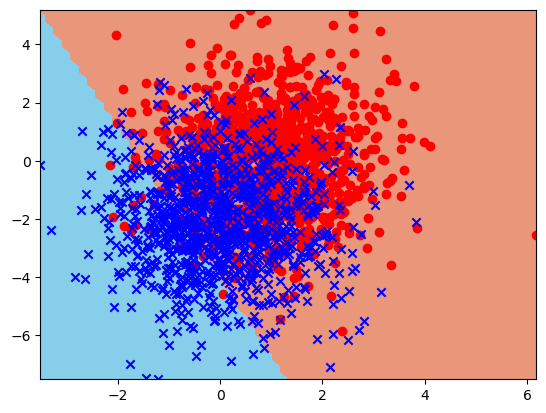

In [59]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 1, 4, step=60)
ut.plot2DSet(np.array([X5D[:,1],X5D[:,4]]).T,Y5D)

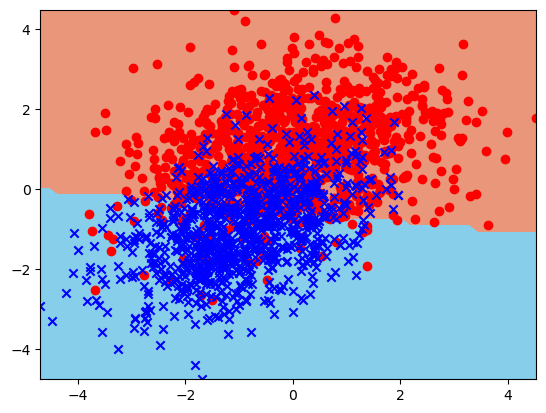

In [60]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 2, 3, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,3]]).T,Y5D)

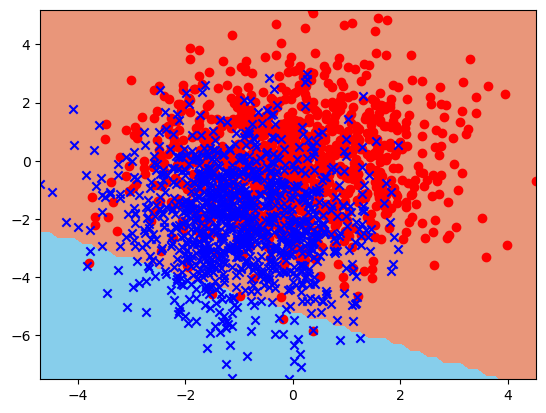

In [61]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 2, 4, step=60)
ut.plot2DSet(np.array([X5D[:,2],X5D[:,4]]).T,Y5D)

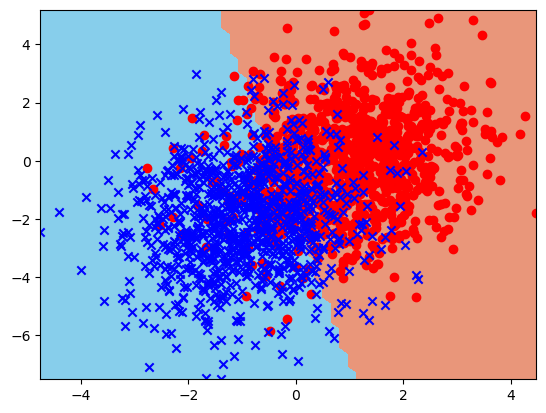

In [62]:
ut.plot_frontiere_high_dimension(X5D,Y5D,perceptron_biais_5D,5, 3, 4, step=60)
ut.plot2DSet(np.array([X5D[:,3],X5D[:,4]]).T,Y5D)

Nb iterations réalisées:  1000
min diff =  0.03254156914416347 , nb etape =  54


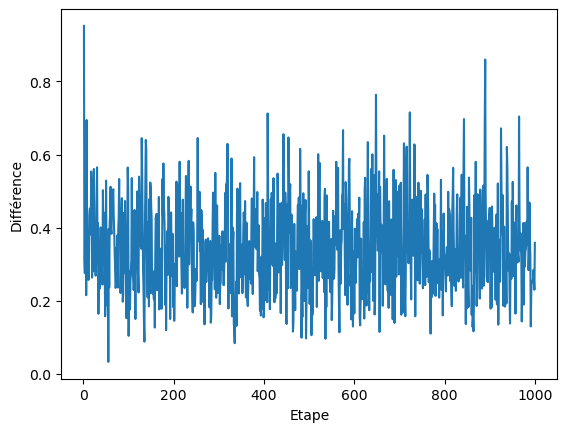

In [63]:
np.random.seed(42)
perceptron_biais_5D = classif.ClassifierPerceptronBiais(5, lr_opt, init_opt)
X_learn_temp, Y_learn_temp, X_test_temp, Y_test_temp = ut.crossval(X5D,Y5D,20,1)
les_variations = perceptron_biais_5D.train(X_learn_temp, Y_learn_temp,nb_max=1000)
print("Nb iterations réalisées: ", len(les_variations) )
print("min diff = ",min(les_variations),", nb etape = ",les_variations.index(min(les_variations)))

plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

nb etape (perceptron classifieur) : 500
nb etape (perceptron biais classifieur) : 54

perceptron peut convergence plus rapide